In [2]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("../data/CICIDS2017/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")

In [4]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,88,640,7,4,440,358,220,0,62.857143,107.349008,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,88,900,9,4,600,2944,300,0,66.666667,132.287566,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,88,1205,7,4,2776,2830,1388,0,396.571429,677.274651,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,88,511,7,4,452,370,226,0,64.571429,110.276708,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,88,773,9,4,612,2944,306,0,68.000000,134.933317,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

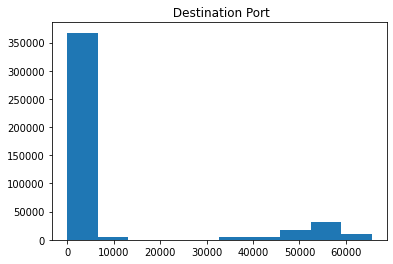

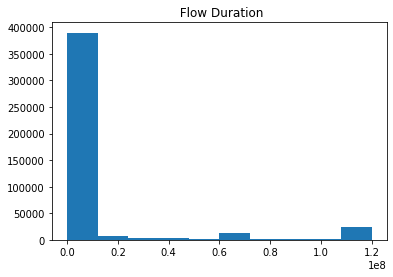

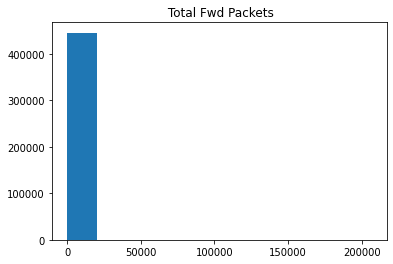

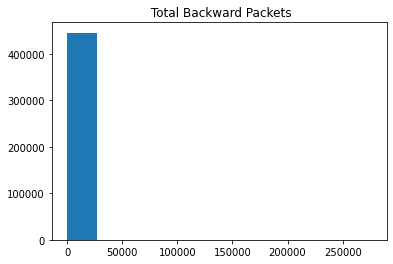

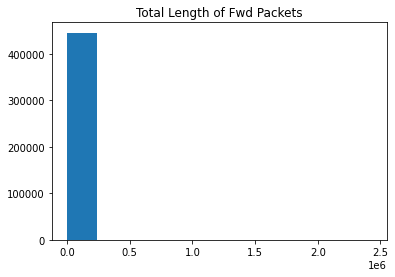

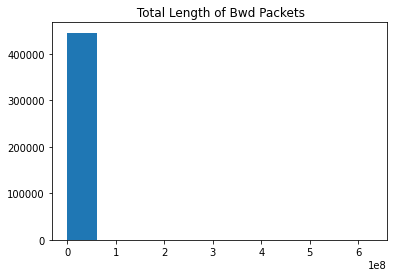

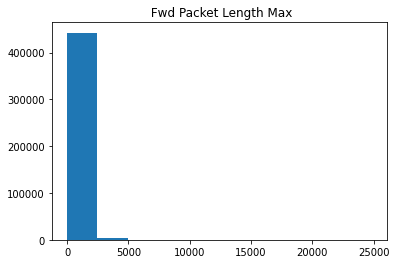

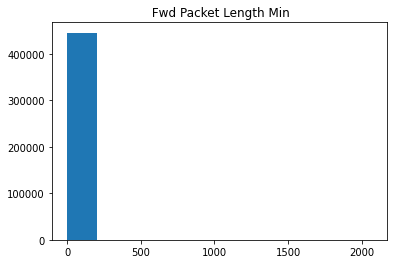

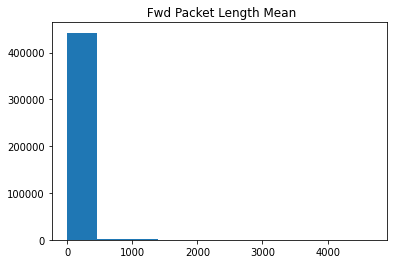

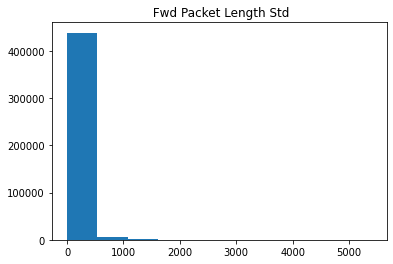

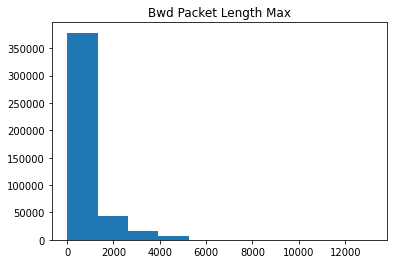

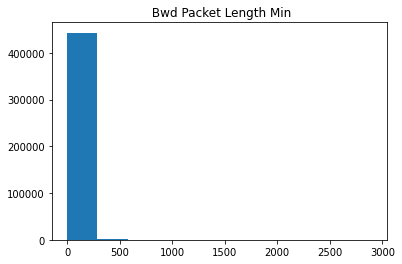

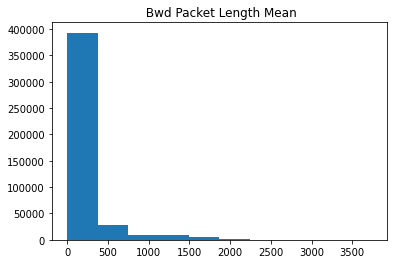

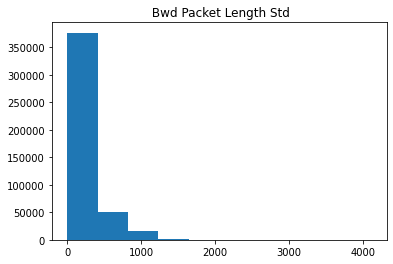

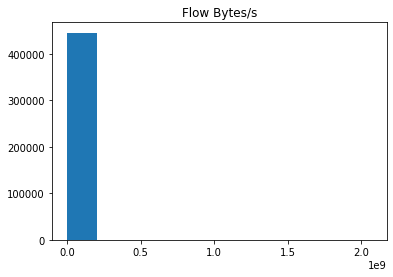

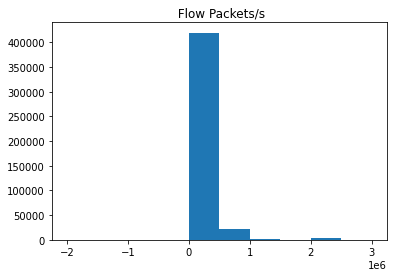

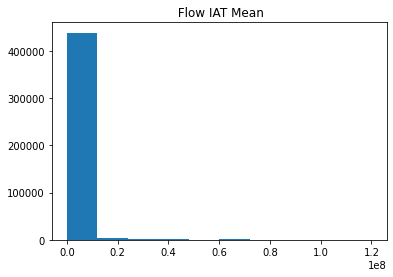

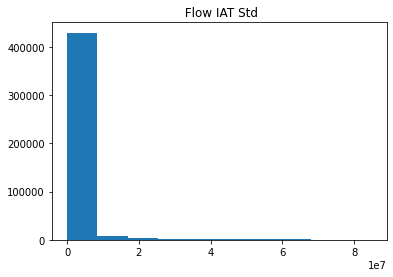

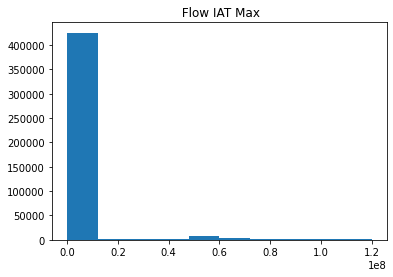

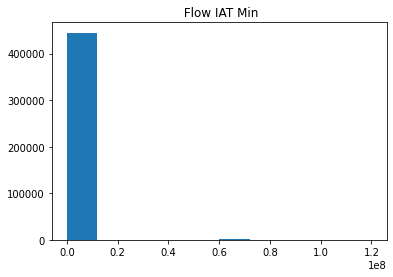

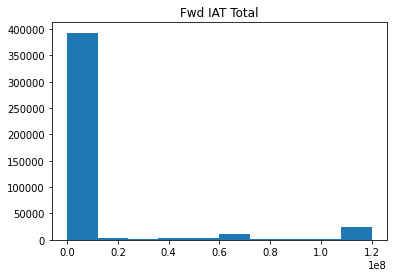

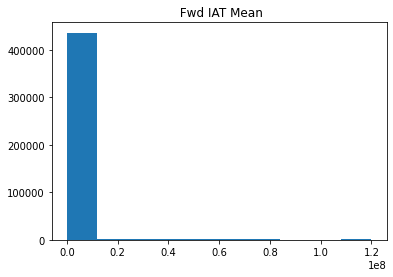

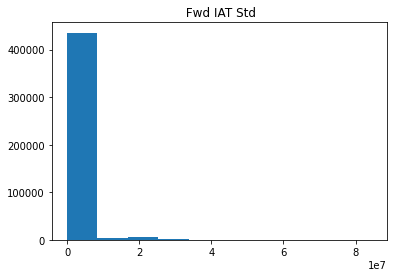

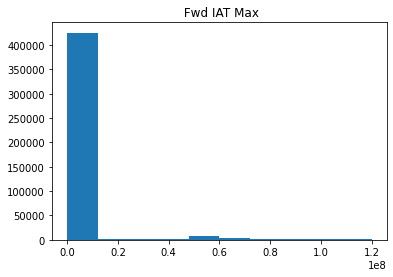

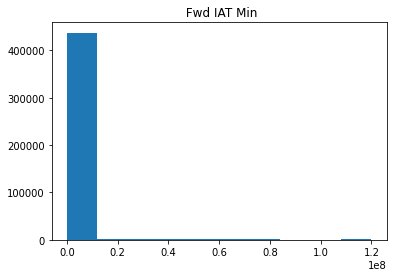

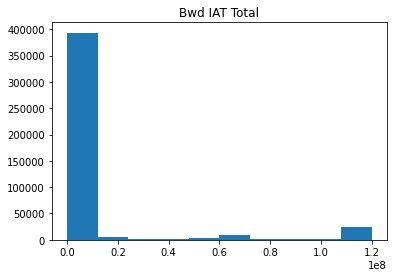

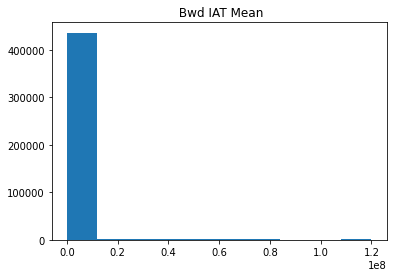

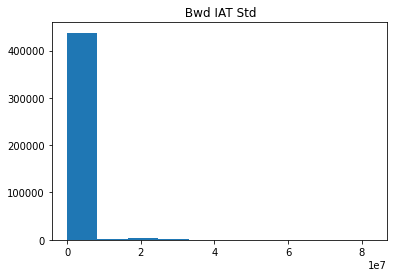

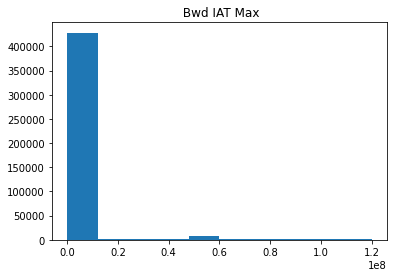

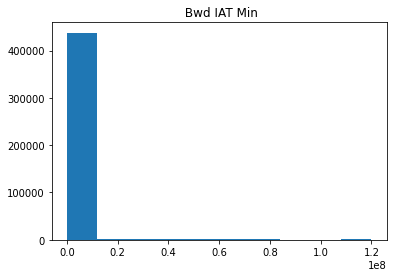

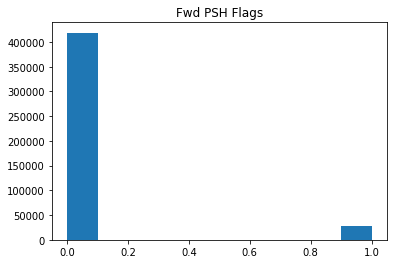

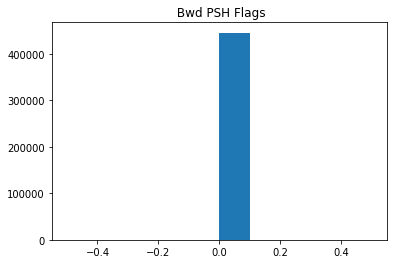

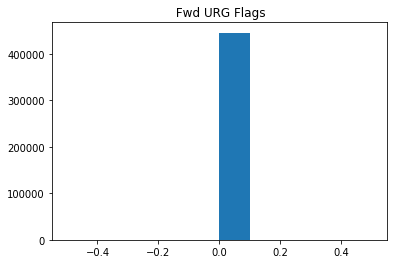

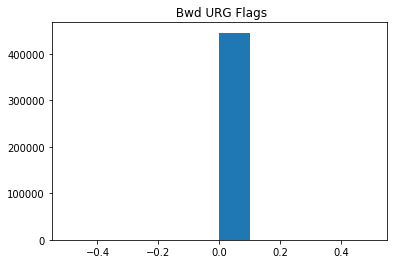

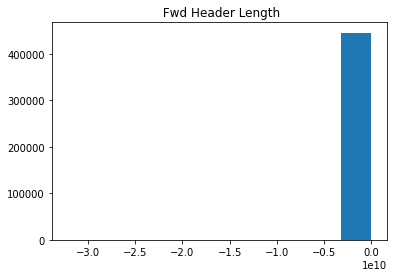

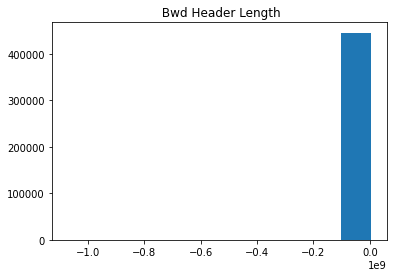

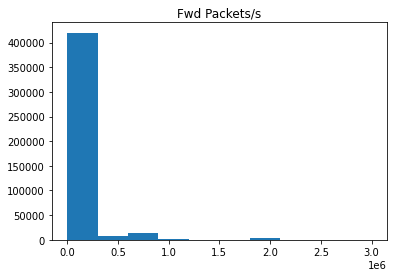

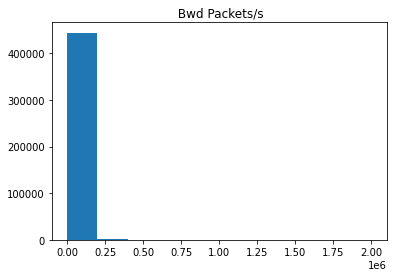

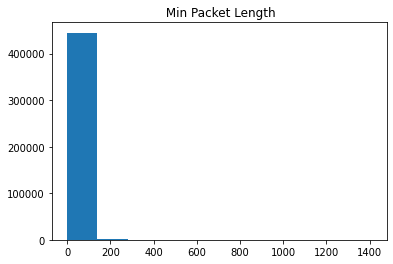

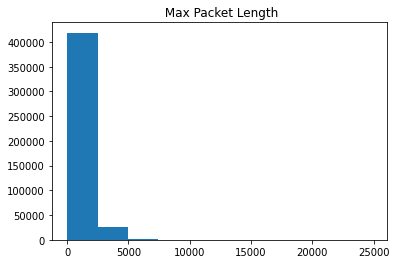

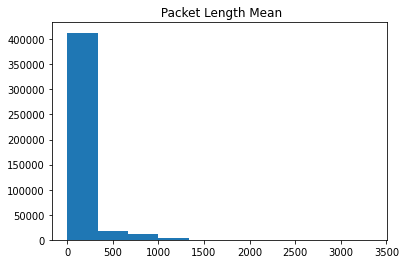

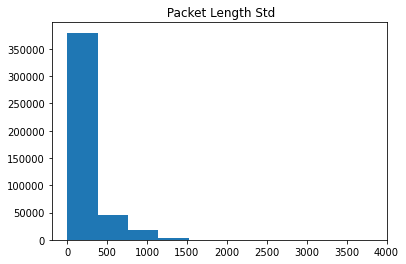

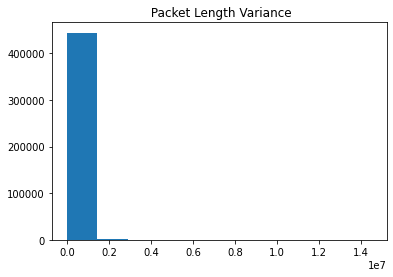

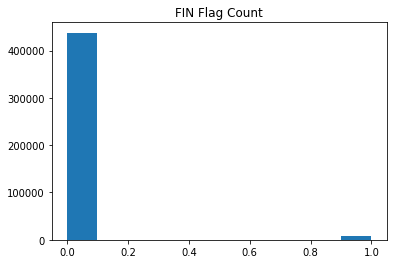

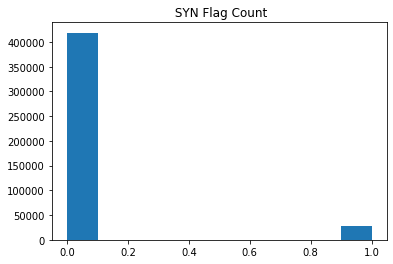

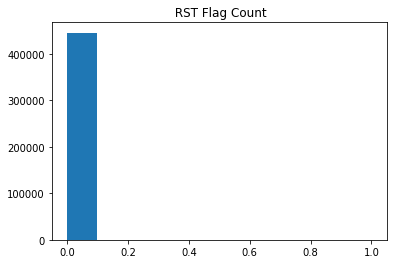

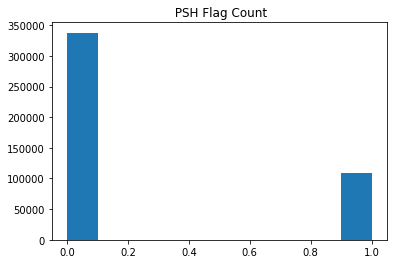

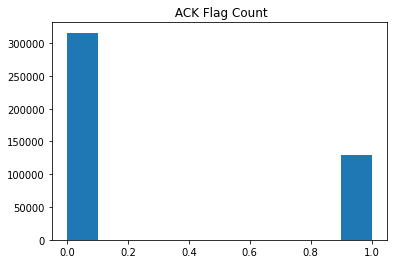

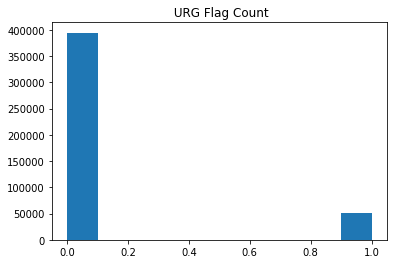

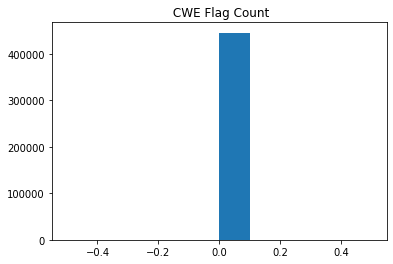

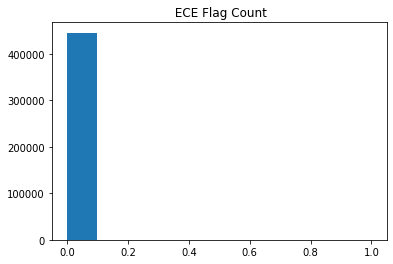

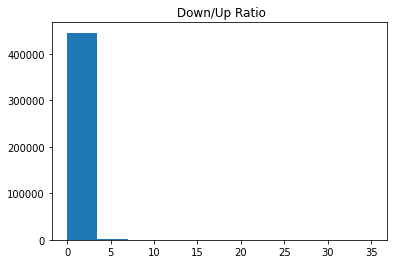

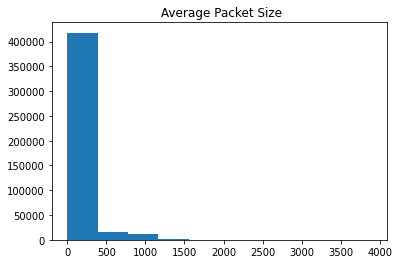

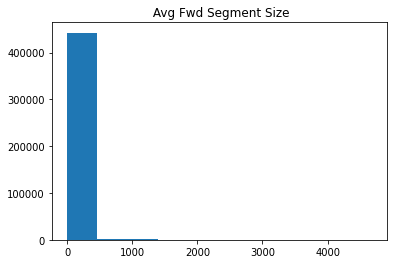

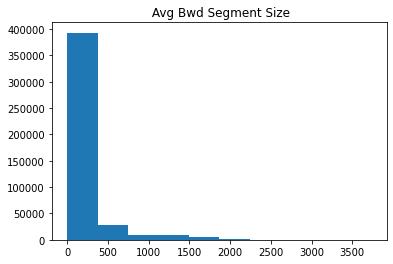

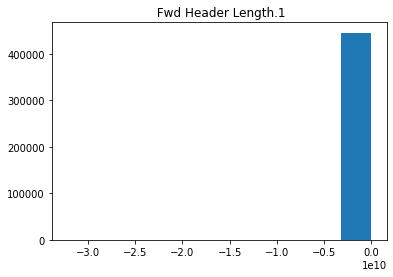

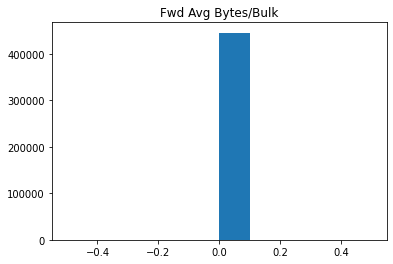

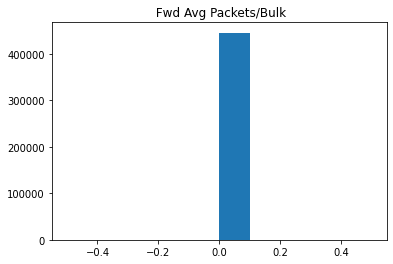

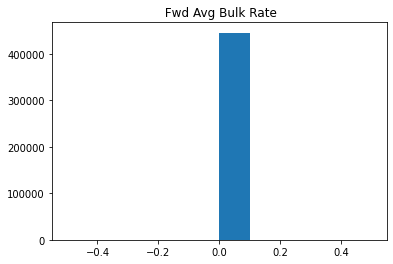

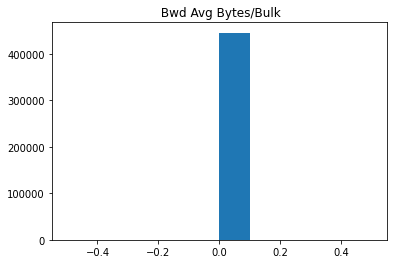

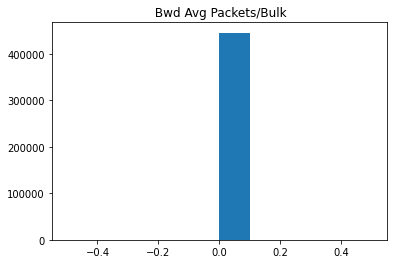

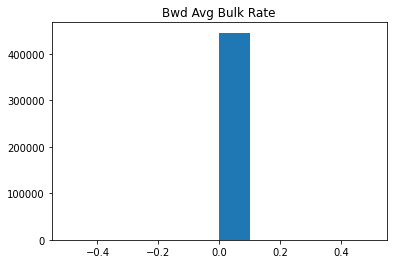

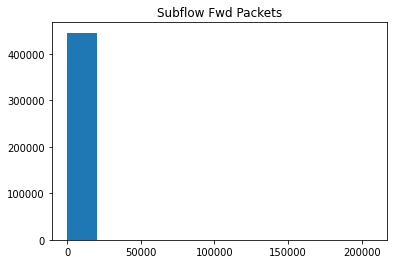

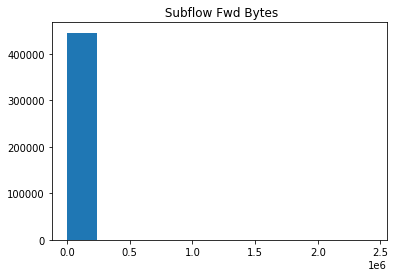

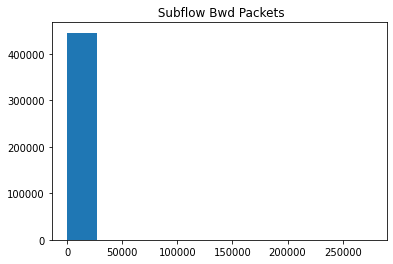

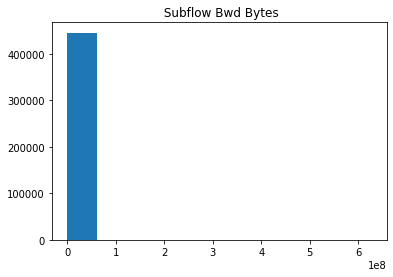

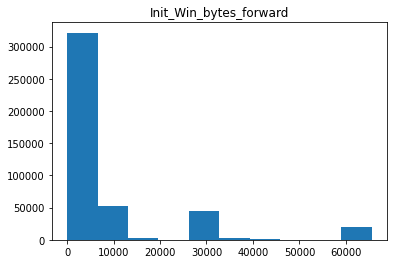

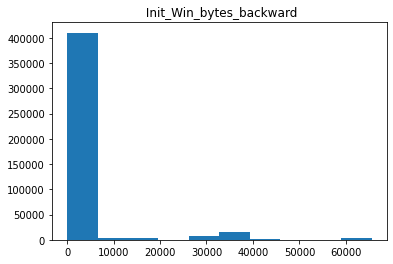

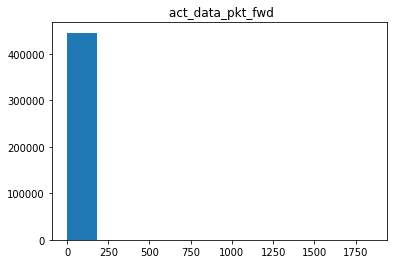

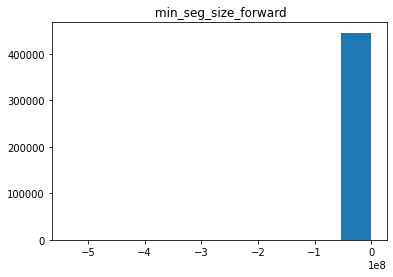

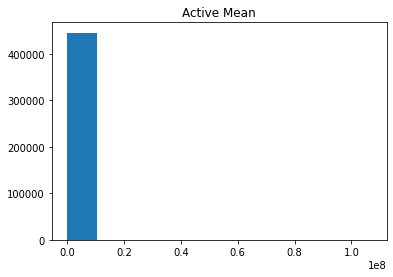

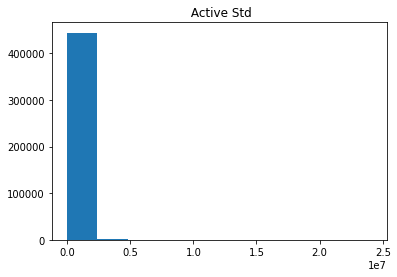

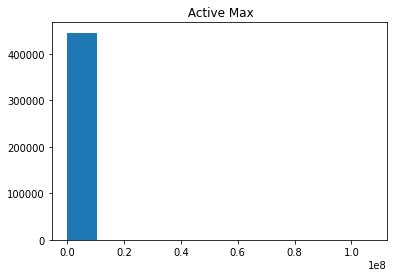

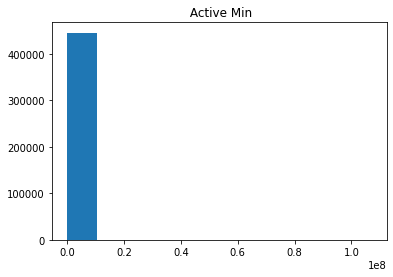

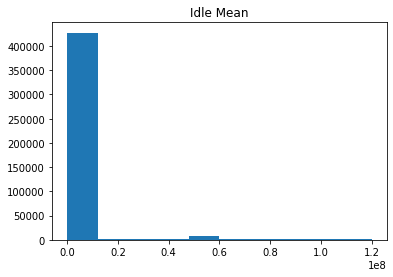

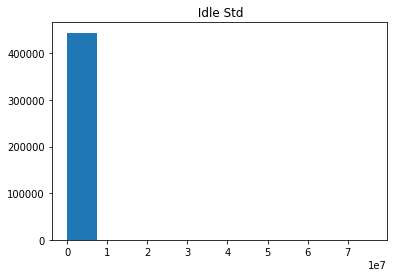

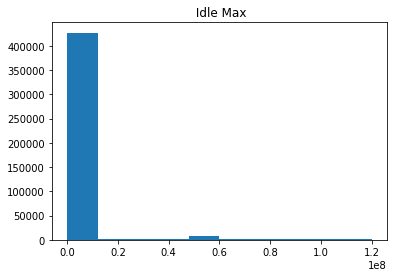

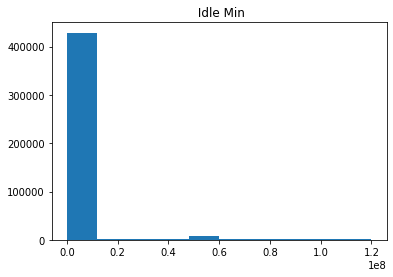

In [5]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
#         print(len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
#               max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))
        plt.title(colname)
        plt.hist(col[np.isfinite(col)])
        plt.show()

In [6]:
for colname in df.columns:
    col = df[colname]
#     print(colname, col.dtypes)
    if col.dtypes in ['int64','float64']:
        print(col.dtypes,len(col)-sum(np.isfinite(col)), sum(pd.isna(col)), sum(pd.isnull(col)),
              max(col[np.isfinite(col)]), min(col[np.isfinite(col)]),len(col.unique()))

int64 0 0 0 65505 0 31858
int64 0 0 0 119999977 -4 195774
int64 0 0 0 206446 1 658
int64 0 0 0 276072 0 828
int64 0 0 0 2428415 0 8396
int64 0 0 0 627000000 0 23135
int64 0 0 0 24820 0 3441
int64 0 0 0 2065 0 187
float64 0 0 0 4672.0 0.0 29206
float64 0 0 0 5398.072094 0.0 52153
int64 0 0 0 13140 0 3968
int64 0 0 0 2896 0 442
float64 0 0 0 3735.736842 0.0 39974
float64 0 0 0 4113.240146 0.0 54599
float64 264 201 201 2070000000.0 0.0 260376
float64 264 0 0 3000000.0 -2000000.0 211867
float64 0 0 0 120000000.0 -4.0 206743
float64 0 0 0 84800000.0 0.0 189448
int64 0 0 0 120000000 -4 135556
int64 0 0 0 120000000 -13 45913
int64 0 0 0 120000000 0 94653
float64 0 0 0 120000000.0 0.0 143083
float64 0 0 0 84400000.0 0.0 127890
int64 0 0 0 120000000 0 94581
int64 0 0 0 120000000 0 30883
int64 0 0 0 120000000 0 60416
float64 0 0 0 120000000.0 0.0 107830
float64 0 0 0 82600000.0 0.0 100499
int64 0 0 0 120000000 0 62937
int64 0 0 0 120000000 0 14727
int64 0 0 0 1 0 2
int64 0 0 0 0 0 1
int64 0 0 0 

In [9]:
labels = df[' Label'].unique()
lb_count = []
for lb in labels:
    lb_count.append(sum(df[' Label']==lb))
    print(sum(df[' Label']==lb))

432074
7938
5897


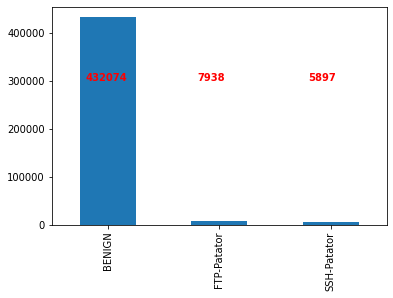

In [10]:
ax = df[' Label'].value_counts().plot(kind='bar')
for i in range(len(labels)):
    ax.text(i-0.2,300000, str(lb_count[i]), color='red', fontweight='bold')

In [11]:
print(labels)

['BENIGN' 'FTP-Patator' 'SSH-Patator']
